In [1]:
%%capture
# !pip install mne
!pip install pywavelets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import mne


In [2]:
%%capture
PATH_TO_DATA = "data/"
categories = ('Healthy', 'Epileptic')

dataset = {categories[0]: [], categories[1]: []}

for category in categories:
  for file_name in glob.glob(f'{PATH_TO_DATA}/{category}/*.fif'):
    file_data = mne.io.read_raw_fif(file_name, preload=True)
    dataset[category].append(file_data)


In [3]:
raw = dataset['Healthy'][0]
raw1 = dataset['Epileptic'][0]
# sigma = np.corrcoef(raw.get_data())
# tetha = np.corrcoef(raw1.get_data())
# sigma = np.corrcoef(raw.get_data()[:400])
# tetha = np.corrcoef(raw1.get_data()[:400])

In [4]:
def cal_hist(s1 , NUM_SAMPLES):
    NUM_BINS= 1000
    step_size = ((max(s1) - min(s1)) / NUM_SAMPLES) * NUM_BINS
    index = np.arange(min(s1) , max(s1) , step_size)
    hist_s1 = [0 for i in range(0, len(index))]
    skip_len = 0 
    
    # import ipdb 
    # ipdb.set_trace()
    idx =0 
    for i in np.arange(min(s1) , max(s1) , step_size):
        for sample in s1:
            if sample > i and sample < i + step_size : 
                try :
                    hist_s1[idx] +=1 
                except : 
                    skip_len += 1
        idx +=1 
    return hist_s1, index , skip_len

In [5]:
def cal_hist_fft(s1 , NUM_SAMPLES):
    NUM_BINS= 1000
    step_size = ((max(s1).real - min(s1).real) / NUM_SAMPLES) * NUM_BINS
    index = np.arange(min(s1).real , max(s1).real , step_size)
    hist_s1 = [0 for i in range(0, len(index))]
    skip_len = 0 
    
    # import ipdb 
    # ipdb.set_trace()
    idx =0 
    for i in np.arange(min(s1).real , max(s1).real , step_size):
        for sample in s1:
            if sample.real > i and sample.real < i + step_size : 
                try :
                    hist_s1[idx] +=1 
                except : 
                    skip_len += 1
        idx +=1 
    return hist_s1, index , skip_len

In [ ]:
for a in range(len(dataset['Healthy'])):
    raw = dataset['Healthy'][a]
    raw1 = dataset['Epileptic'][0]
    fig, ax = plt.subplots(nrows=4, ncols=5)
    j = 0 
    k = 0
    for i in range(19)  :
        data_1 = raw.get_data()[i] 
        shape_1 = raw.get_data()[0].shape[0]
        hist_s1 , index1 , skipped_1 = cal_hist(data_1 , shape_1 )
        data_2 = raw1.get_data()[i]
        shape_2 = raw.get_data()[0].shape[0]
        hist_s2 , index2 , skipped_2 = cal_hist( data_2 , shape_2 )
        print(j,k)
        ax[j,k].plot(index1 , hist_s1)
        ax[j,k].plot( index2  ,hist_s2 )
        k+=1
        if k == 5 and j == 3 :
            break
        if k%5 == 0:
            k=0
            j +=1
    # fig.set_size_inches(18.5, 10.5)
    # fig.savefig(f'compare_pt{a}_with_0.png', dpi=100)
    print(f"Patient : {a}")
    # fig.show()

In [6]:
def fft_avraged_values(tt_data, channel) :
    tt_data = raw.get_data()
    val = [] 
    for j in range(0 , tt_data.shape[1] - 249 , 250):
        data_1 = np.fft.fft(raw.get_data()[channel][j:j+250])
        param = [] 
        for i in range(0 , 201 , 50 ) :
            param.append(sum(data_1[i:i+50]) / 50)
        val.append(param)
    # print(val)
    return val


In [21]:
data_size = len(raw.get_data()[0])
fft_val = np.array([])
for i in range(0 , data_size , 250):
    fft_val = np.concatenate(fft_val , np.array(fft_avraged_values(raw.get_data()[:250] , 0  )[i]) )
plt.plot(fft_val)
# plt.plot(np.fft.fftshift(raw.get_data()[0][:250]))
fft_val

TypeError: only integer scalar arrays can be converted to a scalar index

C:\Users\abhis\AppData\Local\Temp\ipykernel_1856\1965242556.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  index = np.arange(min(s1).real , max(s1).real , step_size)
C:\Users\abhis\AppData\Local\Temp\ipykernel_1856\1965242556.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in np.arange(min(s1).real , max(s1).real , step_size):


Patient : 0


C:\Users\abhis\AppData\Local\Temp\ipykernel_1856\1447587634.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


KeyboardInterrupt: 

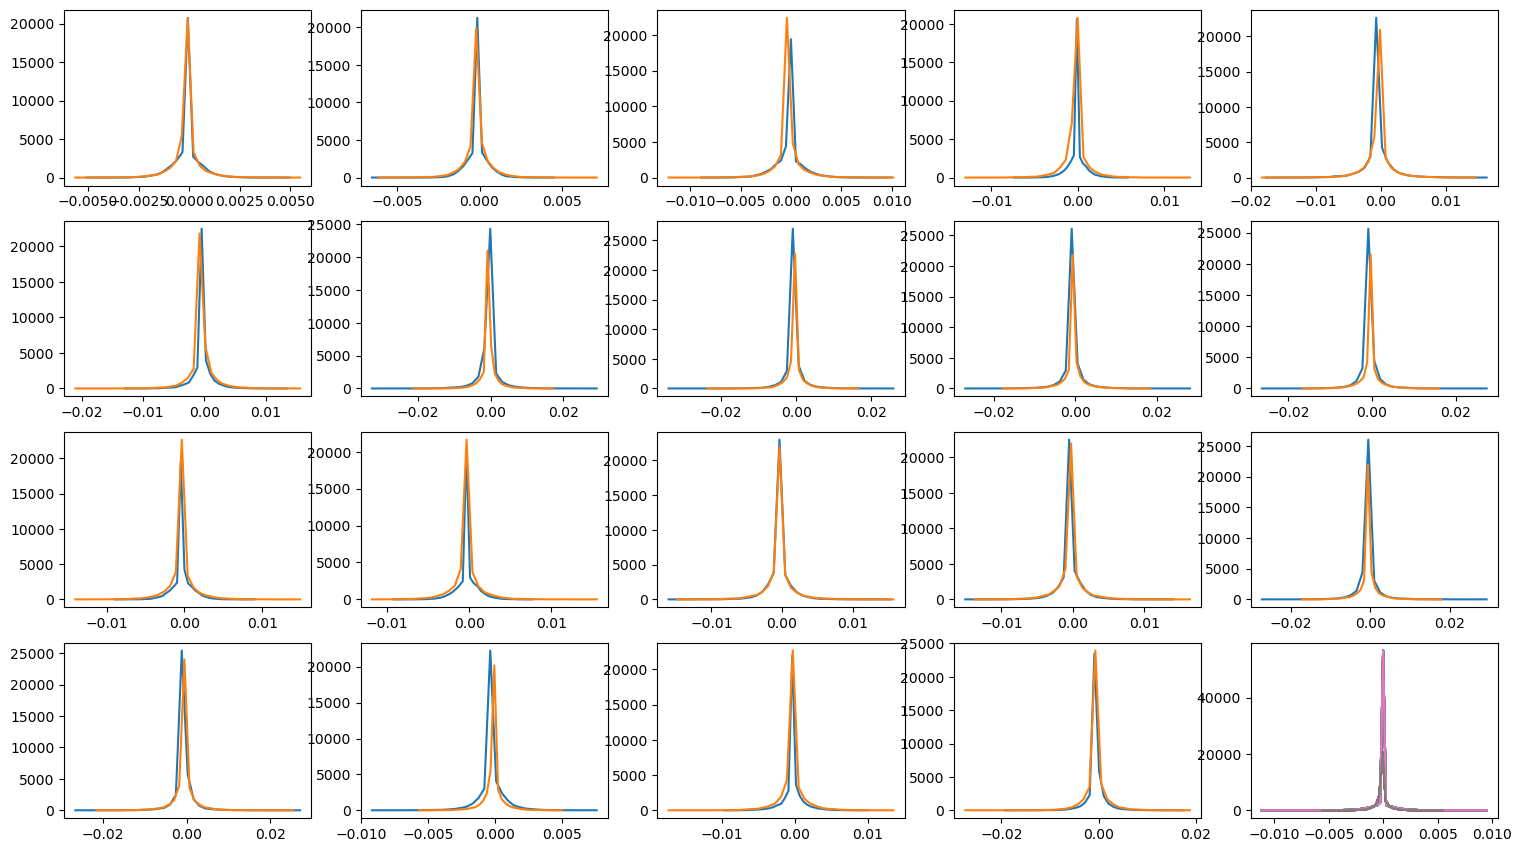

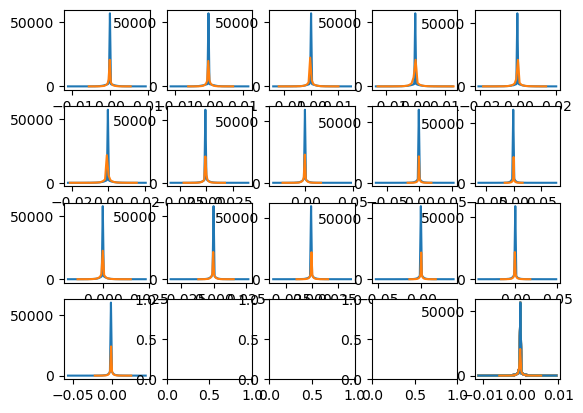

In [33]:
for a in range(len(dataset['Healthy'])):
    raw = dataset['Healthy'][a]
    raw1 = dataset['Epileptic'][0]
    fig, ax = plt.subplots(nrows=4, ncols=5)
    j = 0 
    k = 0
    for i in range(19)  :
        data_1 = np.fft.fft(raw.get_data()[i])
        hist_s1 , index1 , skipped_1 = cal_hist_fft(data_1 , data_1.shape )
        data_2 = np.fft.fft(raw1.get_data()[i])
        hist_s2 , index2 , skipped_2 = cal_hist_fft(data_2 , data_2.shape )
        plt.plot(index_1 , hist_1)
        plt.plot(index_2 , hist_2)
        # print(j,k)
        ax[j,k].plot(index1 , hist_s1)
        ax[j,k].plot( index2  ,hist_s2 )    
        k+=1
        if k == 5 and j == 3 :
            break
        if k%5 == 0:
            k=0
            j +=1
    fig.set_size_inches(18.5, 10.5)
    fig.savefig(f'FFT_outputs/fft_pt{a}_with_0.png', dpi=100)
    print(f"Patient : {a}")
    fig.show()

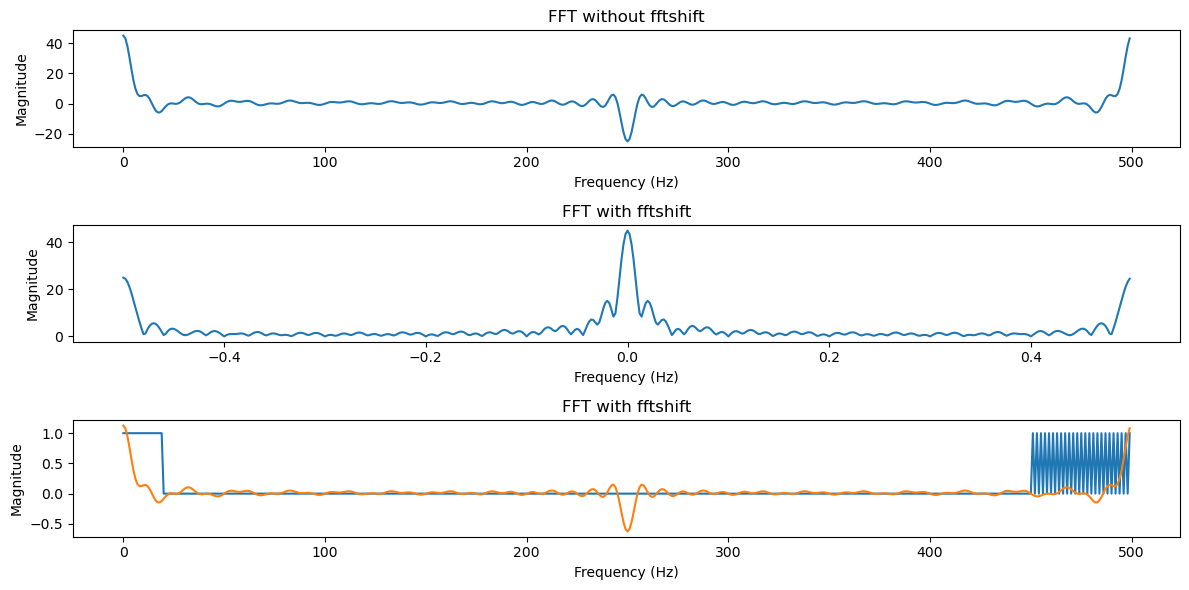

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal
t = np.linspace(0, 1, 500, endpoint=False)
freq = 5  # frequency of the sine wave
signal = np.zeros(500)
signal[:20] =  1
signal[-50:] = [i%2  for i in range(0,50)]
# Compute the FFT of the signal
signal_fft = np.fft.fft(signal)

# Get the frequency bins
freqs = np.fft.fftfreq(len(t))

# Plot the original FFT output
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(signal_fft)
plt.title("FFT without fftshift")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# Apply fftshift to center the zero frequency component
shifted_fft = np.fft.fftshift(signal_fft)
shifted_freqs = np.fft.fftshift(freqs)

# Plot the shifted FFT output
plt.subplot(3, 1, 2)
plt.plot(shifted_freqs, np.abs(shifted_fft))
plt.title("FFT with fftshift")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.subplot(3, 1, 3)
plt.plot(signal) 
plt.plot(signal_fft/40)
plt.title("FFT with fftshift")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()
